## Task 1

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.


In [38]:
import pandas as pd

df = pd.read_csv("Salaries.csv", sep=",")

df[40:80]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [47]:
df.dtypes #Display the data types of each column

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [ ]:
df.isnull().sum() #Check on each column the sum of missing values

# Task 2

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [ ]:
# Calculate the mean salary using mean
mean_salary = df['TotalPayBenefits'].mean()
print("mean salary : ", mean_salary)

# Calculate the median salary using median
median_salary = df['TotalPayBenefits'].median()
print("median salary : ",median_salary)

# Calculate the mode
mode_salary = df['TotalPayBenefits'].mode()[0] #We can display only one or display all of them as a list if we have mores than one
print("mode salary : ",mode_salary)
mode_salary = df['TotalPayBenefits'].mode()
modes_list = mode_salary.tolist() #Convert the result into a list
print("Modes:", modes_list)

# Calculate the minimum
min_salary = df['TotalPayBenefits'].min()
print("minimum salary : ",min_salary)

# Calculate the maximum
max_salary = df['TotalPayBenefits'].max()
print("maximum salary : ",max_salary)

# Calculate the rang
range_salary = max_salary - min_salary
print("range of salary : ",range_salary)

# Calculate the deviation using std
std_deviation = df['TotalPayBenefits'].std()
print("deviation : ",std_deviation)

# Task 3

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

In [ ]:
#Replace NaN by Employee to give all of them an Employee status if we want to add extern or others status in the future
df['Status'].fillna("Employee", inplace=True)

In [46]:
#Replace all NaN BasePay, Benefits, Notes, OtherPay and OvertimePay with 0.00 as they have a float type
df['BasePay'].fillna(0.00, inplace=True)
df['Benefits'].fillna(0.00, inplace=True)
df['OtherPay'].fillna(0.00, inplace=True)
df['OvertimePay'].fillna(0.00, inplace=True)

# Task 4

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

#### Distribution of Salaries

In [ ]:
import matplotlib.pyplot as plt

# We will use TotalPayBenefits to create our bins (between 10 and 20 seems to be good) 
plt.hist(df['TotalPayBenefits'], bins=15, edgecolor='Orange')

# Add the label for our chart
plt.title('Distribution of Salaries')
plt.xlabel('Total Salary')
#Number of employee will be calculated automaticaly according to the number of employee founded in the range of each bin
plt.ylabel('Number of Employee')

# Displaying the chart result
plt.show()

#### Proportion of Employees by Departments

In [ ]:
import matplotlib.pyplot as plt

# Create a function that will analyse each job title and return the department using string manipulation method
def extract_department(job_title):
    # Check if the job title contains a ','
    if ',' in job_title:
        department = job_title.split(',')[1].strip()
        # Exclude specific job titles that start with "Grp" after the comma (ex : "BdComm Mbr, Grp5,M$100/Mo")
        if department.startswith("Grp"):
            return 'Not Specified'
        else:
            # Remove () to clean department title
            return department.replace('(', '').replace(')', '')
    # Handle job titles where the department is enclosed in () without ','
    elif '(' in job_title:
        # Extract text within the ()
        return job_title.split('(')[1].split(')')[0].strip()
    
    else:
        # Assign 'Not Specified' to job titles that do not match the above patterns
        return 'Not Specified'

# For each job title inside the data frame we will call our function the clean the data and put the informations inside a new data frame
df['Department'] = df['JobTitle'].apply(extract_department)

# Exclude 'Not Specified' Department from our data frame on a new series
filtered_df = df[df['Department'] != 'Not Specified']

# Count the Employee on each department on a new series
department_counts = filtered_df['Department'].value_counts()
# Calculate the total number of department
total = department_counts.sum()
# department_counts is the number of employee on each deparement devided by the total number of all department we have the proportion of each department
# Convert the proportion of each department to pourcentage using * 100
percentages = (department_counts / total) * 100
# As we have a lot of wrong data and it's hard to clean every use case to extract the department we will only display department having mores than 1% of employee
filtered_departments = percentages[percentages > 1]

# Create our Diagram
plt.figure(figsize=(10, 8))
plt.pie(filtered_departments, labels=filtered_departments.index, autopct='%1.0f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion of Employees by Departments mores than 1%')
plt.show()

# Task 5

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.


In [ ]:
import matplotlib.pyplot as plt

### ---- Calculate the evolution of BasePay by Year ---- ###

# Create new group object with the data grouped by year
grouped_data = df.groupby('Year')

# Create new series with the average BasePay for each year
average_salary_by_year = grouped_data['BasePay'].mean()

# Create Graphic axes
years = average_salary_by_year.index
average_salary = average_salary_by_year.values

# Create the graph
plt.figure(figsize=(10, 6))
plt.plot(years, average_salary, marker='o')  

# To Avoid year with decimal, we specify that x axe will only follow the years in our data
plt.xticks(years)

# Add label
plt.title('Average salary per year')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)

# Display the graph
plt.show()

# Task 6

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

Pearson Correlation: 0.65


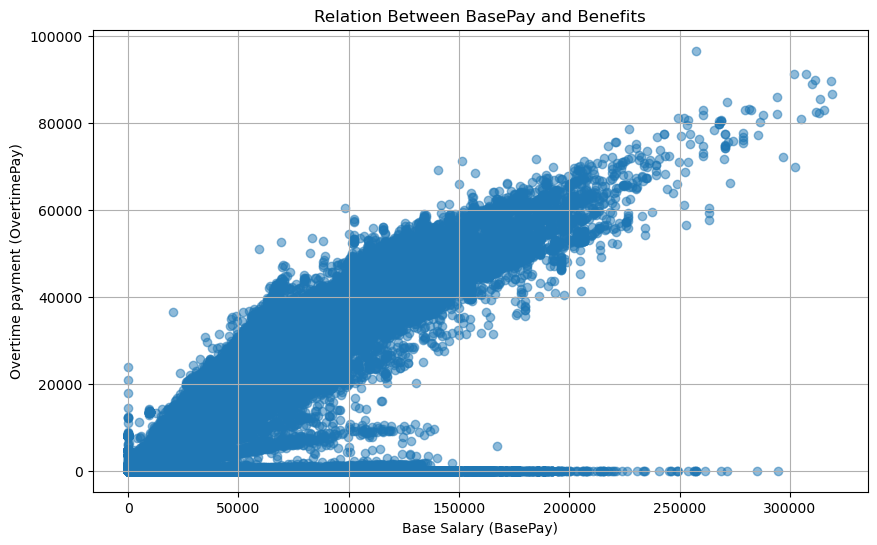

In [138]:
import matplotlib.pyplot as plt

# Will use Pearson correlation to analyse which column to use in our scatter
correlation = df['BasePay'].corr(df['Benefits'])
# Display only two value after . for mores clarity
print(f"Pearson Correlation: {correlation:.2f}")

# We will have a good positive correlation with Benefits vs BasePay
plt.figure(figsize=(10, 6))
plt.scatter(df['BasePay'], df['Benefits'], alpha=0.5)
plt.title('Relation Between BasePay and Benefits')
plt.xlabel('Base Salary (BasePay)')
plt.ylabel('Overtime payment (OvertimePay)')
plt.grid(True)
plt.show()





Task 8

As we can observe, it becomes evident that as an employee's BasePay increases, there is a corresponding general increase in the Benefits they receive. This correlation strongly suggests a significant positive relationship between an employee's salary and the associated benefits. Perhaps, it would be beneficial to engage in a more in-depth discussion on this topic with HR department to gain a better understanding of the nature and magnitude of this relationship.